# Parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [2]:
from numpy import conjugate as conj

In [3]:
from numpy import zeros

In [4]:
sqrt2=np.sqrt(2)

#Parameters

Theta = np.pi/2   #np.random.rand()
Phi   = 0         #np.random.rand()




#Number of atoms

N=1000000


#Basic parameters

gR=1

KapR= 15*gR*sqrt(( (cos(Theta/2))**2 )*N)

gL=1

KapL= 15*gL*sqrt(( (sin(Theta/2))**2 )*N)



### Complex Drivings

fractionRx=0.85
fractionRy=0.85
fractionLx=0.0
fractionLy=0.0



# Detuning



DeltaR=0 *gR*sqrt(( (cos(Theta/2))**2 )*N)   
DeltaL=0 *gL*sqrt(( (sin(Theta/2))**2 )*N)   








#Parameters




chiR=DeltaR*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)
chiL=DeltaL*(gL**2)/(DeltaL**2+(KapL/2)**2+1e-10)



GammaR=KapR*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)
GammaL=KapL*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)


# Critical frequencies


Omega_cR=(N* (cos(Theta/2))**2 /2 ) * np.sqrt( GammaR**2 + 4* chiR**2 )
Omega_cL=(N* (sin(Theta/2))**2 /2 ) * np.sqrt( GammaL**2 + 4* chiL**2 )

OmegaR=fractionRx*Omega_cR
OmegaL=fractionLx*Omega_cL







#Magnetic fields

fractionBe=0.0
fractionBg=0.0


Be=fractionBe*Omega_cR 
Bg=fractionBg*Omega_cL



#Dephasing

Ca=0
Cb=0



print(chiR,chiL,OmegaR,OmegaL,GammaR,GammaL)


0.0 0.0 80.13876853447539 0.0 0.0003771236166328253 0.00037712361663282525


In [5]:
print(Omega_cR,Theta,Phi)

94.28090415820634 1.5707963267948966 0


# Time

In [6]:
T1=250
T2=22000
c_fact=2


tng=(T1+T2)/(4*Omega_cR )#   (T1+T2)/(4*Omega_cR )   #This 4 is due to the 2 factor in the formula Omega_c and the cos(45deg)**2

t1_step1=T1/(4*Omega_cR )
t2_step2=T2/(4*Omega_cR )


t_final=tng*1.01  #*2 +0.05*  2*np.pi/c_fact


print(4*Omega_cR *t_final,tng)


22472.5 58.99922205525256


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit




from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix


# Definition of Dicke-Generalized States

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt


#--------------------------------------

State_List=[]

import scipy.special





import time 

import itertools
from itertools import permutations
from numba import jit


In [8]:
pip install sdeint

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)



def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)





theta = Theta
phi   = Phi

steps1=3500000


tf=t_final
t_alt = np.linspace(0,tf,steps1)

print(tf/steps1,N*GammaR*t_final,t_final)    

1.7025489793087165e-05 22472.499999999996 59.589214275805084


In [10]:
sqrt2=np.sqrt(2)
sqrt3=np.sqrt(3)
sqrt6=np.sqrt(6)
sqrt12=np.sqrt(12)

In [11]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)



#Z matrix


f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
#matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
#matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
#matrix_array.append(f2z)


f3z=np.zeros((4, 4),dtype=complex_)
f3z[3][3]=1




# Gell-Mann type matrices

f01z=np.zeros((4, 4),dtype=complex_)
f01z[0][0]= 1/sqrt2
f01z[1][1]=-1/sqrt2
matrix_array.append(f01z)


f012z=np.zeros((4, 4),dtype=complex_)
f012z[0][0]= 1/sqrt6
f012z[1][1]= 1/sqrt6
f012z[2][2]=-2/sqrt6
matrix_array.append(f012z)


f0123z=np.zeros((4, 4),dtype=complex_)
f0123z[0][0]= 1/sqrt12
f0123z[1][1]= 1/sqrt12
f0123z[2][2]= 1/sqrt12
f0123z[3][3]=-3/sqrt12
matrix_array.append(f0123z)


#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------
#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

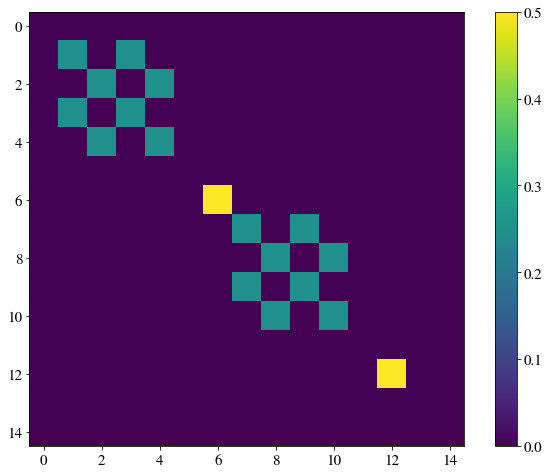

In [12]:

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [13]:
tng

58.99922205525256

In [14]:
from numpy import exp

In [15]:
def c_profile(t,t1_step1=t1_step1,t2_step2=t2_step2):

    sigma=t2_step2/(1.2*4.71)   #  https://en.wikipedia.org/wiki/Full_width_at_half_maximum
    
    return exp(-(t- (t1_step1+t2_step2/2)  )**2/(2*(sigma**2))) 

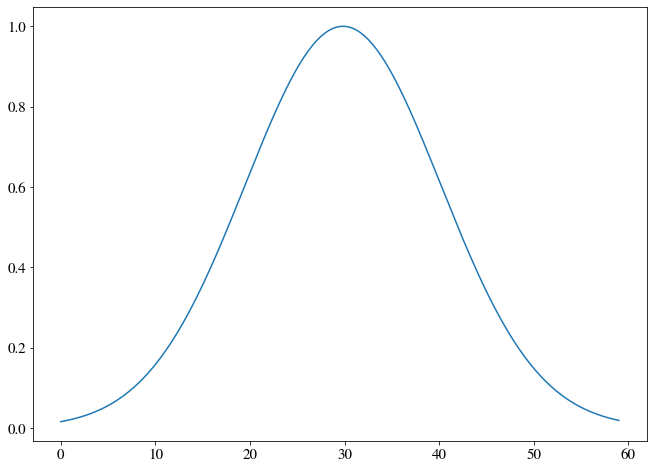

In [16]:
t_test=np.linspace(0,t1_step1+t2_step2,10000)


Res_t=[]


for j in t_test:
    Res_t.append(c_profile(j)   )



plt.plot(t_test,Res_t)
#plt.yscale("log")


In [17]:
from numpy import diff
dydx = diff(Res_t)/diff(t_test)

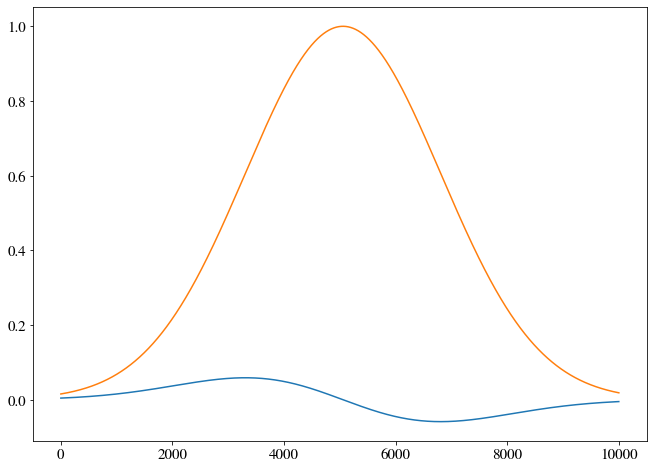

In [18]:
plt.plot(dydx)
plt.plot(Res_t)

#plt.yscale("log")

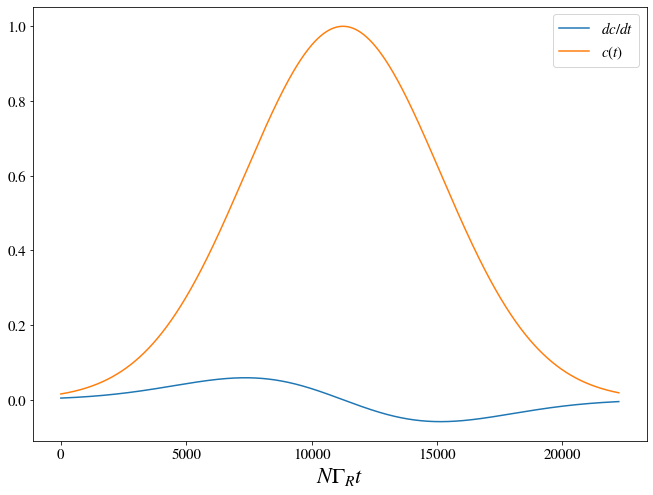

In [19]:
plt.plot(4*Omega_cR*t_test[:len(t_test)-1],dydx,label="$dc/dt$")
plt.plot(4*Omega_cR*t_test,Res_t,label="$c(t)$")
plt.xlabel("$N\Gamma_R t$",fontsize=22)

plt.legend()

In [20]:

Stand_Be=Omega_cR 
Stand_Bg=Omega_cR 
fraction_time=1  #/3



@jit

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def f(y, t):





    #def c_profile(t,t1_step1=t1_step1,t2_step2=t2_step2):

    #    sigma=t2_step2/(1.2*4.71)   #  https://en.wikipedia.org/wiki/Full_width_at_half_maximum
    
    #    return exp(-(t- (t1_step1+t2_step2/2)  )**2/(2*(sigma**2))) 




    def Fraction_con_cos(t):
    
        Driving_bef  =fractionRx
        Driving_after=fractionRx
        Driving_fin  =0
    
    
        if t<t1_step1:
            return Driving_bef
        elif t1_step1<=t<=t1_step1+t2_step2:
            return Driving_after *np.cos(c_fact*(t-t1_step1))
        else:
            return Driving_fin


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



    def Fraction_con_sin(t):
    
        Driving_bef1  =0.0
        Driving_after1=fractionRx
    
        if t<t1_step1:
            return Driving_bef1

        elif t1_step1<=t<=t1_step1+t2_step2:
            return Driving_after1 *np.sin(c_fact*(t-t1_step1))

        else:
            return 0          

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Be(t):
    
        Be_bef  =0
        Be_after=0
    
    
        if t< T1*fraction_time:
            return Be_bef
        else:
            return Be_after



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Bg(t):
    
        Bg_bef  =0
        Bg_after=0
    
    
        if t< T1*fraction_time:
            return Bg_bef
        else:
            return Bg_after



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Caf(t):

        if t< T1:
            return 0.0 
        else:
            return 0*   Omega_cR    #*Val_Omega_cR


    def Cbf(t):

        if t< T2:
            return 0 
        else:
            return 0.0   #*Val_Omega_cR

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    Ca=0  #Caf(t)
    Cb=0  #Cbf(t)

      
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    #s0z=y[12]   #z0
    #s1z=y[13]   #z1
    #s2z=y[14]   #z2
    
    
    
    s0 =y[12]   #Gell-Mann type 0
    s1 =y[13]   #Gell-Mann type 1
    s2 =y[14]   #Gell-Mann type 2


    ### Complex Drivings



    #fractionLx=0
    #fractionLy=0



    OmegaR    = Fraction_con_cos(t)*Omega_cR  
    OmegaR_im = Fraction_con_sin(t)*Omega_cR 

    OmegaL    = 0   #fractionRx*Omega_cR 
    OmegaL_im = 0 #*Fraction_con_sin(t)*Omega_cR 
    

    Be=0  #Be(t)    #Magnetic field excited states
    Bg=0  #Bg(t)    #Magnetic field ground states

    #print(OmegaR,OmegaR_im,OmegaL,OmegaL_im,N*GammaR*t)
    
    ##### (N-s2z-s1z-2*s0z)=s3z-s0z=-s0/sqrt2-s1/sqrt6-2*s2/sqrt3

    ##### (s2z-s1z)                =s0/sqrt2-3*s1/sqrt6
    
    ##############
    
    
    Difs3zs0z=-s0/sqrt2-s1/sqrt6-2*s2/sqrt3
    Difs2zs1z=s0/sqrt2-3*s1/sqrt6
    Difs3zs2z=sqrt6*s1/3-(2*sqrt3/3)*s2
    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx+(gR/sqrt2)*s30y        
    dalpRydt =  DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt2)*s30x
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt2)*s21y 
    dalpLydt =  DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt2)*s21x 
         
      
        
    ds10xdt  = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y  -(1/2)*(OmegaR_im*s31x+OmegaL_im*s20x)
            
    ds20xdt  = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y     -(1/2)*(OmegaR_im*s32x-OmegaL_im*s10x)+(Be*s30y-Bg*s21y)/2   +Ca*s20y
            
    ds30xdt  = (-sqrt2*gR)*alpRy*Difs3zs0z             +OmegaR_im*(-Difs3zs0z)/sqrt2+(Be*s20y-Bg*s31y)/2   +Cb*s30y
            
    ds21xdt  = (-sqrt2*gL)*alpLy*Difs2zs1z             +OmegaL_im*(-Difs2zs1z)/sqrt2+(Be*s31y-Bg*s20y)/2   +Ca*s21y
            
    ds31xdt  = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y   +(1/2)*(OmegaR_im*s10x-OmegaL_im*s32x)  +(Be*s21y-Bg*s30y)/2   +Cb*s31y
            
    ds32xdt  = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y  +(1/2)*(OmegaR_im*s20x+OmegaL_im*s31x)   +(Cb-Ca)*s32y


        
    ds10ydt  = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x    +(1/2)*(OmegaR_im*s31y-OmegaL_im*s20y)+Bg*(-sqrt2*s0 )/sqrt2
        
    ds20ydt  = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x   +(1/2)*(OmegaR_im*s32y+OmegaL_im*s10y)+(Bg*s21x-Be*s30x)/2   -Ca*s20x

    ds30ydt  = (2*gR*alpRx+OmegaR)*(Difs3zs0z)/sqrt2+(Bg*s31x-Be*s20x)/2   -Cb*s30x
                
    ds21ydt  = (2*gL*alpLx+OmegaL)*(Difs2zs1z)/sqrt2 +(Bg*s20x-Be*s31x)/2   -Ca*s21x 
        
    ds31ydt  = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x    -(1/2)*(OmegaR_im*s10y+OmegaL_im*s32y)+(Bg*s30x-Be*s21x)/2   -Cb*s31x
            
    ds32ydt  = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x    +(1/2)*(-OmegaR_im*s20y+OmegaL_im*s31y)+Be*Difs3zs2z/sqrt2   -(Cb-Ca)*s32x
        
    ds0zdt   =  ( sqrt2)*(gR*( alpRx*s30y-alpRy*s30x) + (OmegaR/2)*s30y )   -OmegaR_im*s30x/sqrt2 +Bg*s10y/sqrt2
    ds1zdt   =  ( sqrt2)*(gL*( alpLx*s21y-alpLy*s21x) + (OmegaL/2)*s21y )   -OmegaL_im*s21x/sqrt2 -Bg*s10y/sqrt2      
    ds2zdt   = -ds1zdt  
    ds3zdt   = -ds0zdt         
    
    
    ds0dt    = (ds0zdt-ds1zdt)/sqrt2
    ds1dt    = (ds0zdt+ds1zdt-2*ds2zdt)/sqrt6    
    ds2dt    = (ds0zdt+ds1zdt+ds2zdt-3*ds3zdt)/sqrt12    


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0dt,ds1dt,ds2dt,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,19))
    Arr[0][-1]=1
    Arr[0][-2]=1
    Arr[0][-3]=1
    Arr[0][-4]=1
    
    return diag(Arr[0])


In [21]:
@jit

def random_vect(KapR=KapR,KapL=KapL):
    Hu=np.zeros((1,19))
    Hu[0][-1]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-3]=np.sqrt(KapR/4)*np.random.normal()
    Hu[0][-4]=np.sqrt(KapR/4)*np.random.normal()
    
    return Hu



In [22]:
inv_frac=5000

Major_index=int(steps1/inv_frac)
#New_column=zeros((steps1//Major_index, int(15*16/2)))
New_column=zeros((steps1//Major_index, int(30)))




def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result






t_reduced=np.zeros((1,steps1//Major_index))

for j in range(steps1//Major_index):
    t_reduced[0][j]=t_alt[Major_index*j]
    
    #for k in range(Ns//Major_index):
    #    y_reduced[k]=y[k*Major_index]
    
time_alt=t_reduced[0]


#  t_reduced[0] is the reduced time vector

# Mean-Field

In [23]:
Stochastic=0


@jit


def stratHeunImpII(f, G, y0, tspan, dW=None):
    

    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):

        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn


    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    Second_moment=[]
    Second_moment_Lambda_LambdaT=[]

    total_elements=4

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k

        

    return y_reduced


@jit

def SDE_sol_mf():

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    
    y0=list(Sum_TWA.flatten())+[0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5)]
    
    return stratHeunImpII(f, GG, y0, t_alt)

In [24]:

import math


def arctan_array(x_array,y_array):
    
    Resu_arc=[]
    
    for j in range(len(x_array)):
        if y_array[j]==0 and x_array[j]==0:
            Resu_arc.append(0)
        else:
            angl=math.atan2(y_array[j],x_array[j])

            Resu_arc.append((angl+0.05)%(2*np.pi)-0.05)

    
    return Resu_arc

In [25]:
Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f01z,f012z,f0123z]
    

In [26]:
Cov_mat_list_alt=[]

for j in range(15):
    Cov_mat_list_alt.append(list(N*real(Cov_mat[j]))) 



ind_shap=len(Matrix_Basis)

In [27]:
MF_res=SDE_sol_mf()

<ipython-input-23-5e9e1b29420f>:55: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "SDE_sol_mf" failed type inference due to: Unknown attribute 'multivariate_normal' of type Module(<module 'numpy.random' from '/usr/local/lib/python3.7/dist-packages/numpy/random/__init__.py'>)

File "<ipython-input-23-5e9e1b29420f>", line 59:
def SDE_sol_mf():
    <source elided>

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    ^

During: typing of get attribute at <ipython-input-23-5e9e1b29420f> (59)

File "<ipython-input-23-5e9e1b29420f>", line 59:
def SDE_sol_mf():
    <source elided>

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "SDE_sol_mf" was compiled in object mode without forceobj=True.

File "<ipython-input-23-5e9e1b29420f>", li

# SH DissTWA

In [28]:
Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f01z,f012z,f0123z]
   

def density_mat(Array):
    
    Array=Array[0:15]
    
    Result=N*np.identity(4)/4
    for j in range(15):
        Result=Result + Array[j]*Matrix_Basis[j]

    return Result

In [29]:
Stochastic=1


@jit



def stratHeunImpII(f, G, y0, tspan, dW=None):
    

    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):

        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn


    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    Second_moment=[]
    Second_moment_Lambda_LambdaT=[]

    total_elements=4

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k

        den_mat_k=density_mat(y_k)

        Lambda_k=(np.ravel(den_mat_k)).reshape(ind_shap+1,1)


        Bloch_like=np.array(y_k[0:ind_shap])
        

        Second_moment.append(Bloch_like.reshape(ind_shap,1)@(Bloch_like.reshape(1,ind_shap)))

        Second_moment_Lambda_LambdaT.append(Lambda_k@conj(Lambda_k.T))
        

    return y_reduced, Second_moment, Second_moment_Lambda_LambdaT

In [30]:
@jit

def SDE_sol():
    
    Sum_TWA=np.random.multivariate_normal(N*real(Miu), Cov_mat_list_alt, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImpII(f, GG, y0, t_alt)

In [31]:


from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =SDE_sol()
    
    Result_First  =Results[0]
    Second_moment =Results[1]
    Second_moment_Lambda_LambdaT=Results[2]

    print(0)

    for j in range(itera-1):
        Trayec=SDE_sol()
        Result_First  =add(Result_First  ,Trayec[0])
        Second_moment =add(Second_moment, Trayec[1])
        Second_moment_Lambda_LambdaT=add(Second_moment_Lambda_LambdaT, Trayec[2])

        print(j+1)
    
    return np.array(Result_First)/int(itera), np.array(Second_moment)/int(itera), np.array(Second_moment_Lambda_LambdaT)/int(itera)

In [ ]:
import time
t0=time.time()

itera=2500
Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:

def Square_mean(Averages):
    Averages=Averages[0:len(Matrix_Basis)].reshape(len(Matrix_Basis),1)
    
    return  Averages*(Averages.T)

Cov_series=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series.append(   np.array(Result_varTWA_Col_SDE[1][j] - Square_mean(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )



len(Cov_series)

#plt.plot(Conserved)
#plt.plot(Ones)

In [ ]:


Eig_1=[]
Eig_2=[]
Eig_3=[]
Eig_4=[]
Eig_5=[]
Eig_6=[]
Eig_7=[]
Eig_8=[]
Eig_9=[]
Eig_10=[]
Eig_11=[]
Eig_12=[]
Eig_13=[]
Eig_14=[]
Eig_15=[]



for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( Cov_series[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1.append(Eigenvalues[-1])
    Eig_2.append(Eigenvalues[-2])
    Eig_3.append(Eigenvalues[-3])
    Eig_4.append(Eigenvalues[-4])
    Eig_5.append(Eigenvalues[-5])
    Eig_6.append(Eigenvalues[-6])
    Eig_7.append(Eigenvalues[-7])
    Eig_8.append(Eigenvalues[-8])
    Eig_9.append(Eigenvalues[-9])
    Eig_10.append(Eigenvalues[-10])
    Eig_11.append(Eigenvalues[-11])
    Eig_12.append(Eigenvalues[-12])   
    Eig_13.append(Eigenvalues[-13])
    Eig_14.append(Eigenvalues[-14])
    Eig_15.append(Eigenvalues[-15])     

In [ ]:

Time_array=4*Omega_cR*time_alt


In [ ]:
plt.plot(Eig_1)
plt.plot(Eig_2)
plt.plot(Eig_3)
plt.plot(Eig_4)
plt.plot(Eig_5)
plt.plot(Eig_6)

plt.yscale("log")

# Rotation

In [ ]:
from scipy.linalg import norm

In [ ]:
import numpy as np
from scipy.linalg import null_space
import scipy

def gram_schmidt(V):
    
    "Return an unitary matrix with the first column equal to the array V"
    
    ns=null_space(np.conjugate(np.array(V)))
    B=ns.T
    C=np.concatenate((V, B), axis=0)
    
    
    GS=[C[0]/scipy.linalg.norm(C[0])]
    for j in range(1,C.shape[0]):
        sum_vect=C[j]
        for k in range(0,j):
            sum_vect=sum_vect-np.dot(np.conjugate(GS[k]),C[j])*GS[k]
        GS.append(sum_vect/scipy.linalg.norm(sum_vect))
    
    return (np.array(GS)).T




#The first column should be equal up to norm to the array introduced

#(GSc@np.conj(GSc.T)).round(5)   #Test that UU^{\dagger}=1


from numpy import conj as conj
from scipy.linalg import eig
"""
def Rot_new_Unitary(Bloch_vector_like):
    
    Density_matrix            = density_mat(Bloch_vector_like)/N  #Single particle density matrix
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order           = Eigenvalues.argsort() 
    Eigenvalues               = Eigenvalues[Ascending_order] 
    
    Lambda_vector=Eigenvectors[:,Ascending_order[0]]
    Unitary_den  = gram_schmidt([list(Lambda_vector)])    
    
    
    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    return np.kron(Transpose_unitary,Conjugate_transpose), Unitary_den

"""    

In [ ]:
def real_init(Vector):
    
    if abs(Vector[0])>10**(-7):
        
        return Vector/(Vector[0]/abs(Vector[0]) )
    else:
        return Vector
        

In [ ]:
def Output_right(Vector):
    
    Term0=Vector[0]
    Term3=Vector[3]
    
    Vector_shape=Vector.shape
    Init_vector=np.zeros(Vector_shape,dtype="complex")    
    
    if Term0==0:
        Init_vector[0]=1
        
    elif Term0!=0 and Term3==0:
        Init_vector[3]=1 
        
    else:
        Init_vector[0]=-np.conj( Term3  )
        Init_vector[3]= np.conj( Term0  )
        
        
        
    if abs(Init_vector[0])>10**(-7):
        
        Init_vector=Init_vector/(Init_vector[0]/abs(Init_vector[0]) )
    

    return Init_vector/norm(Init_vector)
        


def Output_left(Vector):
    
    Term1=Vector[1]
    Term2=Vector[2]
    
    Vector_shape=Vector.shape
    Init_vector=np.zeros(Vector_shape,dtype="complex")    
    
    if Term1==0:
        Init_vector[1]=1
        
    elif Term1!=0 and Term2==0:
        Init_vector[2]=1 
        
    else:
        Init_vector[1]=-np.conj( Term2  )
        Init_vector[2]= np.conj( Term1  )
        
        
    if abs(Init_vector[1])>10**(-7):
        
        Init_vector=Init_vector/(Init_vector[1]/abs(Init_vector[1]) )
        
        

    return Init_vector/norm(Init_vector)
        
        
        

def Rot_new_Unitary_alt(Bloch_vector_like):
    
    Density_matrix            = density_mat(Bloch_vector_like)/N  #Single particle density matrix
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order           = Eigenvalues.argsort() 
    Eigenvalues               = Eigenvalues[Ascending_order] 
    
    Lambda_vector =Eigenvectors[:,Ascending_order[0]]
    Lambda_vector1=Eigenvectors[:,Ascending_order[1]]
    Column0=Lambda_vector
    Column1=(Output_right(Lambda_vector))
    Column2=(Output_left(Lambda_vector)) 
    
    Unitary_k=np.zeros((4,4),dtype="complex")
    
    
    Unitary_k[:,0]=Column0
    Unitary_k[:,1]=Column1
    Unitary_k[:,2]=Column2
    
    
    Vect0=np.random.rand(4,)
    Vect0=Vect0-np.dot(np.conj(Column0),Vect0)*Column0-np.dot(np.conj(Column1),Vect0)*Column1-np.dot(np.conj(Column2),Vect0)*Column2

    Vect0= Vect0/norm(Vect0)

    Unitary_k[:,3]=Vect0
    
    Unitary_k[:,0]=real_init(Unitary_k[:,0])

    Unitary_k[:,3]=real_init(Unitary_k[:,3])
    
    
    Transpose_unitary   =Unitary_k.T
    Conjugate_transpose =np.conjugate(Unitary_k.T)

    return np.kron(Transpose_unitary,Conjugate_transpose), Unitary_k, Lambda_vector , Lambda_vector1,-Eigenvalues

In [ ]:
def Square_mean_ij(Bloch_vector_like):

    Density_matrix=density_mat(Bloch_vector_like)

    Lambda_k=(np.ravel(Density_matrix)).reshape(ind_shap+1,1)

    
    return  Lambda_k@conj(Lambda_k.T)

Cov_series_ij=[]   #Covariance in the base ij

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] - Square_mean_ij(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )


    
Correl_series_ij=[]  #Correlation in the base ij

for j in range(len(Result_varTWA_Col_SDE[0])):
    Correl_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] )/  (N/2)    )

    

In [ ]:
C_tilde_matrices=[]

Unitaries_gener=[]


Lambda_vector=[]

Lambda1_vector=[]

Lambda_vectorR=[]
Lambda_vectorL=[]
Lambda_vectorD=[]


Populations_eigen=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]

    Array_bloch=Rot_new_Unitary_alt(Bloch_vector_like)

    Unita_C_Gen       = Array_bloch[0]

    #C_matrix          = Result_varTWA_Col_SDE[2][j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)
    
    Unitaries_gener.append(Array_bloch[1]   )


    Lambda_vector.append(Array_bloch[2])

    Lambda1_vector.append(Array_bloch[3])

    Populations_eigen.append(Array_bloch[4])
    
    
    U_j=Array_bloch[1]
    
    Lambda_vectorR.append(U_j[:,1]  )
    Lambda_vectorL.append(U_j[:,2]  )
    Lambda_vectorD.append(U_j[:,3]  )
    
    C_tilde_matrices.append( np.conjugate(Unita_C_Gen)@( Cov_series_ij[j] @  np.conjugate(Con_transpose_unit))  )         #Transforms the covariance matrix
    #C_tilde_matrices.append( Unita_C_Gen@( Correl_series_ij[j] @  Con_transpose_unit)  )     #Transforms the correlation matrix
    


In [ ]:
## Visualize the C_tilde matrix 


#plt.imshow(np.abs(C_tilde_matrices[0]))
#plt.colorbar()
#plt.show()

In [ ]:

# Get the submatrix taking the row(column) 1,2,3,4,8,12

C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )

In [ ]:
plt.imshow(np.abs(C_submatrix[0]))
plt.colorbar()
plt.show()

In [ ]:



Eig_1_ij=[]
Eig_2_ij=[]
Eig_3_ij=[]
Eig_4_ij=[]
Eig_5_ij=[]
Eig_6_ij=[]
Eig_7_ij=[]
Eig_8_ij=[]
Eig_9_ij=[]
Eig_10_ij=[]
Eig_11_ij=[]
Eig_12_ij=[]
Eig_13_ij=[]
Eig_14_ij=[]
Eig_15_ij=[]
Eig_16_ij=[]

for j in range(len(Cov_series_ij)):
    Eigenvalues=scipy.linalg.eig( Cov_series_ij[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_ij.append(Eigenvalues[-1])
    Eig_2_ij.append(Eigenvalues[-2])
    Eig_3_ij.append(Eigenvalues[-3])
    Eig_4_ij.append(Eigenvalues[-4])
    Eig_5_ij.append(Eigenvalues[-5])
    Eig_6_ij.append(Eigenvalues[-6])
    Eig_7_ij.append(Eigenvalues[-7])
    Eig_8_ij.append(Eigenvalues[-8])
    Eig_9_ij.append(Eigenvalues[-9])
    Eig_10_ij.append(Eigenvalues[-10])
    Eig_11_ij.append(Eigenvalues[-11])
    Eig_12_ij.append(Eigenvalues[-12])
    Eig_13_ij.append(Eigenvalues[-13])
    Eig_14_ij.append(Eigenvalues[-14])
    Eig_15_ij.append(Eigenvalues[-15])
    Eig_16_ij.append(Eigenvalues[-16])




fontsize=30


plt.title("Eigenvalues Covariance Matrix associated to C",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2


plt.plot(Time_array[:indep],np.real(Eig_1_ij[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2_ij[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3_ij[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4_ij[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5_ij[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6_ij[:indep]),label="6th")
plt.plot(Time_array[:indep],np.real(Eig_7_ij[:indep]),label="7th")
plt.plot(Time_array[:indep],np.real(Eig_8_ij[:indep]),label="8th")
plt.plot(Time_array[:indep],np.real(Eig_9_ij[:indep]),label="9th")
plt.plot(Time_array[:indep],np.real(Eig_10_ij[:indep]),label="10th")
plt.plot(Time_array[:indep],np.real(Eig_11_ij[:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12_ij[:indep]),label="12th")
plt.plot(Time_array[:indep],np.real(Eig_13_ij[:indep]),label="13th")
plt.plot(Time_array[:indep],np.real(Eig_14_ij[:indep]),label="14th")
plt.plot(Time_array[:indep],np.real(Eig_15_ij[:indep]),label="15th")
plt.plot(Time_array[:indep],np.real(Eig_16_ij[:indep]),label="16th")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')



plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),label="6th")

plt.xscale('log')
plt.yscale('log')



plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')

plt.legend()


#plt.savefig("abc.pdf")

#files.download("abc.pdf") 

In [ ]:

Eig_1_sub=[]
Eig_2_sub=[]
Eig_3_sub=[]
Eig_4_sub=[]
Eig_5_sub=[]
Eig_6_sub=[]


for j in range(len(C_submatrix)):
    Eigenvalues=scipy.linalg.eig( C_submatrix[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_sub.append(Eigenvalues[-1])
    Eig_2_sub.append(Eigenvalues[-2])
    Eig_3_sub.append(Eigenvalues[-3])
    Eig_4_sub.append(Eigenvalues[-4])
    Eig_5_sub.append(Eigenvalues[-5])
    Eig_6_sub.append(Eigenvalues[-6])

In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")

plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")


plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")


plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")

plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")




plt.xscale('log')
plt.yscale('log')



plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.axvline(x=Time_array[Eig_6_sub.index(min(Eig_6_sub))], color='g')




plt.legend()


plt.savefig("abc.png")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [ ]:
print(Eig_1[Eig_6_sub.index(min(Eig_6_sub))],Eig_2[Eig_6_sub.index(min(Eig_6_sub))],Eig_6_sub[Eig_6_sub.index(min(Eig_6_sub))],Time_array[Eig_6_sub.index(min(Eig_6_sub))])

In [ ]:
print(fractionRx,Eig_1[Eig_6_sub.index(min(Eig_6_sub))],Eig_2[Eig_6_sub.index(min(Eig_6_sub))],Eig_6_sub[Eig_6_sub.index(min(Eig_6_sub))],Time_array[Eig_6_sub.index(min(Eig_6_sub))])

In [ ]:
plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")
plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')


In [ ]:
plt.plot(Time_array[:indep],(np.real(Eig_6_sub[:indep]))**(-1),"--",label="6th rot")
plt.plot(Time_array[:indep],(np.real(Eig_6[:indep]))**(-1),'-.',label="6th")
plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.legend()


In [ ]:


plt.title("Purity Dynamics",fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
plt.ylabel('Tr$( \\rho^2)$',fontsize=fontsize)



Purity=[]


for j in range(Result_varTWA_Col_SDE[0].shape[0]):

    mat_j=density_mat(Result_varTWA_Col_SDE[0][j:j+1,][0])/(N)

    Purity.append(np.trace(mat_j@mat_j)  )


plt.xscale('log')
plt.yscale('log')


plt.plot(Time_array,Purity)

plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')
plt.axvline(x=Time_array[Eig_6_sub.index(min(Eig_6_sub))], color='g')


In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

"""plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")"""

"""plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")"""



"""plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")"""


"""plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")"""


#plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
#plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")

plt.plot(Time_array[:indep],np.real(Eig_7_ij[:indep]),'-.',label="7th")


#plt.xscale('log')
plt.yscale('log')



#plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
#plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')


plt.legend()


plt.savefig("abc.png")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [ ]:
print(fractionRx,-10*np.log10(min(Eig_6)))

In [ ]:
print(Theta,Phi)

In [ ]:
decimals=3
start=2


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6, 2,figsize=(15,15))
fig.suptitle('Comparison of Normalized Expected Values For Collective Operators',fontsize=20)



left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.96      # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


yeSH=(Result_varTWA_Col_SDE[0][:,6]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,0]/sqrt(2))/(N/2)

mfyeSH=(MF_res[:,6]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,0]/sqrt(2))/(N/2)

ax1.plot(Time_array, xeSH,label="DissTWA $ S_{01x}$")
ax1.plot(Time_array, yeSH,label="DissTWA $ S_{01y}$")
ax1.plot(Time_array, mfxeSH,'--',label="MF $ S_{01x}$")
ax1.plot(Time_array, mfyeSH,'--',label="MF $ S_{01y}$")
ax1.legend()

ax1.axvline(x=4*Omega_cR*t1_step1 , color='b')
ax1.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')




yeSH=(Result_varTWA_Col_SDE[0][:,6]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,0]/sqrt(2))/(N/2)
ax2.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'b',label="DissTWA $\\theta_{01,+}$")

yeSH=(MF_res[:,6]/sqrt(2))/(N/2)
xeSH=(MF_res[:,0]/sqrt(2))/(N/2)
ax2.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{01,+}$")

ax2.axvline(x=4*Omega_cR  *tng, color='b')
ax2.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")




ax2.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,7]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,1]/sqrt(2))/(N/2)
ax4.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'g',label="DissTWA $\\theta_{02,+}$")

yeSH=(MF_res[:,7]/sqrt(2))/(N/2)
xeSH=(MF_res[:,1]/sqrt(2))/(N/2)
ax4.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{02,+}$")


ax4.axvline(x=4*Omega_cR  *tng, color='b')
ax4.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")




ax4.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,8]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,2]/sqrt(2))/(N/2)
ax6.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'r',label="DissTWA $ \\theta_{03,+}$")

yeSH=(MF_res[:,8]/sqrt(2))/(N/2)
xeSH=(MF_res[:,2]/sqrt(2))/(N/2)
ax6.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{03,+}$")

ax6.axvline(x=4*Omega_cR  *tng, color='b')
ax6.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax6.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,9]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,3]/sqrt(2))/(N/2)
ax8.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'k',label="DissTWA $\\theta_{12,+}$")

yeSH=(MF_res[:,9]/sqrt(2))/(N/2)
xeSH=(MF_res[:,3]/sqrt(2))/(N/2)
ax8.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{12,+}$")

ax8.axvline(x=4*Omega_cR  *tng, color='b')
ax8.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax8.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,10]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,4]/sqrt(2))/(N/2)
ax10.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'m',label="DissTWA $\\theta_{13,+}$")

yeSH=(MF_res[:,10]/sqrt(2))/(N/2)
xeSH=(MF_res[:,4]/sqrt(2))/(N/2)
ax10.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{13,+}$")


ax10.axvline(x=4*Omega_cR  *tng, color='b')
ax10.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")

ax10.legend()


yeSH=(Result_varTWA_Col_SDE[0][:,11]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,5]/sqrt(2))/(N/2)
Theta23=arctan_array(xeSH ,yeSH)[start:]
Res_red=[]

for j in range(len(Theta23)):
    Res_red.append(Theta23[j]%(2*np.pi-0.01))


ax12.plot(Time_array[start:], Res_red,'',label="DissTWA $\\theta_{23,+}$")


yeSH=(MF_res[:,11]/sqrt(2))/(N/2)
xeSH=(MF_res[:,5]/sqrt(2))/(N/2)
ax12.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{23,+}$")

ax12.axvline(x=4*Omega_cR  *tng, color='b')
ax12.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax12.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,7]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,1]/sqrt(2))/(N/2)
mfyeSH=(MF_res[:,7]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,1]/sqrt(2))/(N/2)

ax3.plot(Time_array, xeSH,label="DissTWA $ S_{02x}$")
ax3.plot(Time_array, yeSH,label="DissTWA $ S_{02y}$")
ax3.plot(Time_array, mfxeSH,'--',label="MF $ S_{02x}$")
ax3.plot(Time_array, mfyeSH,'--',label="MF $ S_{02y}$")

ax3.axvline(x=4*Omega_cR  *tng, color='b')
ax3.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax3.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,8]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,2]/sqrt(2))/(N/2)
mfyeSH=(MF_res[:,8]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,2]/sqrt(2))/(N/2)

ax5.plot(Time_array, xeSH,label="DissTWA $ S_{03x}$")
ax5.plot(Time_array, yeSH,label="DissTWA $ S_{03y}$")
ax5.plot(Time_array, mfxeSH,'--',label="MF $ S_{03x}$")
ax5.plot(Time_array, mfyeSH,'--',label="MF $ S_{03y}$")

ax5.axvline(x=4*Omega_cR  *tng, color='b')
ax5.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")



ax5.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,9]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,3]/sqrt(2))/(N/2)
mfyeSH=(MF_res[:,9]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,3]/sqrt(2))/(N/2)

ax7.plot(Time_array, xeSH,label="DissTWA $ S_{12x}$")
ax7.plot(Time_array, yeSH,label="DissTWA $ S_{12y}$")
ax7.plot(Time_array, mfxeSH,'--',label="MF $ S_{12x}$")
ax7.plot(Time_array, mfyeSH,'--',label="MF $ S_{12y}$")

ax7.axvline(x=4*Omega_cR  *tng, color='b')
ax7.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax7.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,10]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,4]/sqrt(2))/(N/2)
mfyeSH=(MF_res[:,10]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,4]/sqrt(2))/(N/2)

ax9.plot(Time_array, xeSH,label="DissTWA $ S_{13x}$")
ax9.plot(Time_array, yeSH,label="DissTWA $ S_{13y}$")
ax9.plot(Time_array, mfxeSH,'--',label="MF $ S_{13x}$")
ax9.plot(Time_array, mfyeSH,'--',label="MF $ S_{13y}$")

ax9.axvline(x=4*Omega_cR  *tng, color='b')
ax9.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")

ax9.legend()

yeSH=(Result_varTWA_Col_SDE[0][:,11]/sqrt(2))/(N/2)
xeSH=(Result_varTWA_Col_SDE[0][:,5]/sqrt(2))/(N/2)
mfyeSH=(MF_res[:,11]/sqrt(2))/(N/2)
mfxeSH=(MF_res[:,5]/sqrt(2))/(N/2)

ax11.plot(Time_array, xeSH,label="DissTWA $ S_{23x}$")
ax11.plot(Time_array, yeSH,label="DissTWA $ S_{23y}$")
ax11.plot(Time_array, mfxeSH,'--',label="MF $ S_{23x}$")
ax11.plot(Time_array, mfyeSH,'--',label="MF $ S_{23y}$")
ax11.axvline(x=4*Omega_cR  *tng, color='b')
ax11.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")

ax11.legend()

#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

ax4.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax4.axvline(x=4*Omega_cR  *(t1_step1+t2_step2), color='b')
ax4.axvline(x=(4*Omega_cR*time_alt[:indep])[Eig_6.index(min(Eig_6))], color='r', linestyle=":")


ax1.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax2.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax3.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax5.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax6.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax7.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax8.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax9.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax10.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax11.axvline(x=4*Omega_cR  *t1_step1 , color='b')
ax12.axvline(x=4*Omega_cR  *t1_step1 , color='b')


plt.savefig("abc.png")
#files.download("abc.pdf")

In [ ]:
N*GammaR

In [ ]:
fractionRx

In [ ]:
((eig(density_mat(Result_varTWA_Col_SDE[0][-1])/N))[1][:,0]).round(4)

In [ ]:
np.array([ 6.5463e-01-2.0000e-05j,  7.0710e-01+0.0000e+00j,
       -0.0000e+00+1.0000e-05j,  1.0000e-05-2.6735e-01j])

In [ ]:
4*Omega_cR  *t1_step1

In [ ]:
print(fractionRx,-10*np.log10(min(Eig_6)),4*Omega_cR*(time_alt[:indep][Eig_6.index(min(Eig_6))]-t1_step1))

In [ ]:
in_index=0


Eig_1_ij=[]
Eig_2_ij=[]
Eig_3_ij=[]
Eig_4_ij=[]
Eig_5_ij=[]
Eig_6_ij=[]
Eig_7_ij=[]
Eig_8_ij=[]
Eig_9_ij=[]
Eig_10_ij=[]
Eig_11_ij=[]
Eig_12_ij=[]
Eig_13_ij=[]
Eig_14_ij=[]
Eig_15_ij=[]
Eig_16_ij=[]

for j in range(len(Cov_series_ij)):
    Eigenvalues=scipy.linalg.eig( Cov_series_ij[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_ij.append(Eigenvalues[-1])
    Eig_2_ij.append(Eigenvalues[-2])
    Eig_3_ij.append(Eigenvalues[-3])
    Eig_4_ij.append(Eigenvalues[-4])
    Eig_5_ij.append(Eigenvalues[-5])
    Eig_6_ij.append(Eigenvalues[-6])
    Eig_7_ij.append(Eigenvalues[-7])
    Eig_8_ij.append(Eigenvalues[-8])
    Eig_9_ij.append(Eigenvalues[-9])
    Eig_10_ij.append(Eigenvalues[-10])
    Eig_11_ij.append(Eigenvalues[-11])
    Eig_12_ij.append(Eigenvalues[-12])
    Eig_13_ij.append(Eigenvalues[-13])
    Eig_14_ij.append(Eigenvalues[-14])
    Eig_15_ij.append(Eigenvalues[-15])
    Eig_16_ij.append(Eigenvalues[-16])




fontsize=30


plt.title("Eigenvalues Covariance Matrix associated to C",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]


#plt.plot(Time_array[:indep],np.real(Eig_1_ij[:indep]),label="1st")
#plt.plot(Time_array[:indep],np.real(Eig_2_ij[:indep]),label="2nd")
#plt.plot(Time_array[:indep],np.real(Eig_3_ij[:indep]),label="3rd")
#plt.plot(Time_array[:indep],np.real(Eig_4_ij[:indep]),label="4th")
plt.plot(Time_array[in_index:indep],np.real(Eig_5_ij[in_index:indep]),label="5th")
plt.plot(Time_array[in_index:indep],np.real(Eig_6_ij[in_index:indep]),label="6th")
plt.plot(Time_array[in_index:indep],np.real(Eig_7_ij[in_index:indep]),label="7th")
plt.plot(Time_array[in_index:indep],np.real(Eig_8_ij[in_index:indep]),label="8th")
plt.plot(Time_array[in_index:indep],np.real(Eig_9_ij[in_index:indep]),label="9th")
plt.plot(Time_array[in_index:indep],np.real(Eig_10_ij[in_index:indep]),label="10th")
plt.plot(Time_array[in_index:indep],np.real(Eig_11_ij[in_index:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12_ij[:indep]),label="12th")
#plt.plot(Time_array[:indep],np.real(Eig_13_ij[:indep]),label="13th")
#plt.plot(Time_array[:indep],np.real(Eig_14_ij[:indep]),label="14th")
#plt.plot(Time_array[:indep],np.real(Eig_15_ij[:indep]),label="15th")
#plt.plot(Time_array[:indep],np.real(Eig_16_ij[:indep]),label="16th")

plt.plot(Time_array[in_index:indep],np.real(Eig_6_sub[in_index:indep]),"--",label="6th rot")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')


plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [ ]:
in_index=10


Eig_1_ij=[]
Eig_2_ij=[]
Eig_3_ij=[]
Eig_4_ij=[]
Eig_5_ij=[]
Eig_6_ij=[]
Eig_7_ij=[]
Eig_8_ij=[]
Eig_9_ij=[]
Eig_10_ij=[]
Eig_11_ij=[]
Eig_12_ij=[]
Eig_13_ij=[]
Eig_14_ij=[]
Eig_15_ij=[]
Eig_16_ij=[]

for j in range(len(Cov_series_ij)):
    Eigenvalues=scipy.linalg.eig( Cov_series_ij[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_ij.append(Eigenvalues[-1])
    Eig_2_ij.append(Eigenvalues[-2])
    Eig_3_ij.append(Eigenvalues[-3])
    Eig_4_ij.append(Eigenvalues[-4])
    Eig_5_ij.append(Eigenvalues[-5])
    Eig_6_ij.append(Eigenvalues[-6])
    Eig_7_ij.append(Eigenvalues[-7])
    Eig_8_ij.append(Eigenvalues[-8])
    Eig_9_ij.append(Eigenvalues[-9])
    Eig_10_ij.append(Eigenvalues[-10])
    Eig_11_ij.append(Eigenvalues[-11])
    Eig_12_ij.append(Eigenvalues[-12])
    Eig_13_ij.append(Eigenvalues[-13])
    Eig_14_ij.append(Eigenvalues[-14])
    Eig_15_ij.append(Eigenvalues[-15])
    Eig_16_ij.append(Eigenvalues[-16])




fontsize=30


plt.title("Eigenvalues Covariance Matrix associated to C",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]


#plt.plot(Time_array[:indep],np.real(Eig_1_ij[:indep]),label="1st")
#plt.plot(Time_array[:indep],np.real(Eig_2_ij[:indep]),label="2nd")
#plt.plot(Time_array[:indep],np.real(Eig_3_ij[:indep]),label="3rd")
#plt.plot(Time_array[:indep],np.real(Eig_4_ij[:indep]),label="4th")
plt.plot(Time_array[in_index:indep],np.real(Eig_5_ij[in_index:indep]),label="5th")
plt.plot(Time_array[in_index:indep],np.real(Eig_6_ij[in_index:indep]),label="6th")
plt.plot(Time_array[in_index:indep],np.real(Eig_7_ij[in_index:indep]),label="7th")
plt.plot(Time_array[in_index:indep],np.real(Eig_8_ij[in_index:indep]),label="8th")
plt.plot(Time_array[in_index:indep],np.real(Eig_9_ij[in_index:indep]),label="9th")
plt.plot(Time_array[in_index:indep],np.real(Eig_10_ij[in_index:indep]),label="10th")
plt.plot(Time_array[in_index:indep],np.real(Eig_11_ij[in_index:indep]),label="11th")

#plt.plot(Time_array[:indep],np.real(Eig_13_ij[:indep]),label="13th")
#plt.plot(Time_array[:indep],np.real(Eig_14_ij[:indep]),label="14th")
#plt.plot(Time_array[:indep],np.real(Eig_15_ij[:indep]),label="15th")
#plt.plot(Time_array[:indep],np.real(Eig_16_ij[:indep]),label="16th")

plt.plot(Time_array[in_index:indep],np.real(Eig_6_sub[in_index:indep]),"--",label="6th rot")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')


plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")

plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")


plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")


plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")

plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")




#plt.xscale('log')
plt.yscale('log')




plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')



plt.legend()


plt.savefig("abc.png")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [ ]:
-10*np.log10(np.min( Eig_6_sub))

In [ ]:
index_min = np.argmin(Eig_6_sub)

Eig_1[index_min]

In [ ]:
Eig_2[index_min]

In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")

plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")


plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")


plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")

plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")




#plt.xscale('log')
plt.yscale('log')




plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')

plt.legend()


plt.savefig("abc.png")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [ ]:
print(fractionRx,-10*np.log10(min(Eig_6_sub)),4*Omega_cR*(time_alt[:indep][Eig_6_sub.index(min(Eig_6_sub))]-t1_step1))


In [ ]:
from scipy.linalg import norm

In [ ]:
from scipy.linalg import eig
import numpy as np
from scipy.linalg import null_space
import scipy

In [ ]:
#ns=null_space(np.conjugate(np.array(V)))

In [ ]:
Coherences_array_SDE=(Result_varTWA_Col_SDE[0][:,0]/sqrt(2))**2

for j in range(1,12):
    if j!=2 and j!=3 and j!=8 and j!=9:
        Coherences_array_SDE=Coherences_array_SDE+(Result_varTWA_Col_SDE[0][:,j]/sqrt(2))**2



In [ ]:

fontsize=30

plt.title("Coherence Function Dynamics",fontsize=fontsize)

plt.plot(Time_array,Coherences_array_SDE**0.5/(N/2),label="Coherences")
plt.ylabel('$C_f/(N/2)$',fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')

plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')


#plt.yscale("log")

In [ ]:
from scipy import linalg


j_initio=15


Aper=np.linspace(0,14,15)
Japer=Aper.astype(int)

Eigenval_listed=[]
Eigenvec_listed=[]
Permutations_ar=[]



eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]

Eigenval_listed.append(eigenValues_0)
Permutations_ar.append(Japer)
Eigenvec_listed.append(eigenVectors_0)


for j in range(j_initio,len(Time_array)-1):
        
    eigenValues_jp1  , eigenVectors_jp1   = linalg.eig(Cov_series[j+1])
    idx_jp1          = eigenValues_jp1.argsort()[::-1]   
    eigenValues_jp1  = eigenValues_jp1[idx_jp1]
    eigenVectors_jp1 = eigenVectors_jp1[:,idx_jp1]

    if j == j_initio:
        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_0)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)

    else:

        eigenValues_j  , eigenVectors_j   = linalg.eig(Cov_series[j])
        idx_j                             = eigenValues_j.argsort()[::-1]   
        eigenValues_j                     = eigenValues_j[idx_j]
        eigenVectors_j                    = eigenVectors_j[:,idx_j]

        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_j)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)


Result_permutation=[Permutations_ar[0]]


for j in range(len(Permutations_ar)-1):

    Per_jp1 = Permutations_ar[j+1]

    Result_permutation.append( Per_jp1[Result_permutation[j]]  )


Arranged_eigenvalues =[]
Arranged_eigenvectors=[]

for j in range(len(Result_permutation)):

    Arranged_eigenvalues.append( Eigenval_listed[j][Result_permutation[j]]   )
    Arranged_eigenvectors.append( Eigenvec_listed[j][Result_permutation[j]]   )


In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)


plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,6],label="Original 7th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,7],label="Original 8th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,8],label="Original 9th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,9],label="Original 10th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,10],label="Original 11th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,11],label="Original 12th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,12],label="Original 13th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,13],label="Original 14th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,14],label="Original 15th")


plt.plot(Time_array[j_initio:],np.real(Eig_6_sub[j_initio:]),"--",label="6th rot")

plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)

plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')




In [ ]:
eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]


Eig_Valist=[]
Eig_Veclist=[]


for j_th in range(len(Cov_series)):
    eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_th])

    idx_0 = eigenValues_0.argsort()[::-1]   
    eigenValues_0  = eigenValues_0[idx_0]
    eigenVectors_0 = eigenVectors_0[:,idx_0]

    Eig_Valist.append(eigenValues_0)
    Eig_Veclist.append(eigenVectors_0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:

def array_Vect_contin(Eig_index):

    Arr_eigvec_index=[]

    for j in range(len(Eig_Veclist)):
        
        Ref_arr_j  =Eig_Veclist[j ][:,Eig_index]
        


        if j==0:
            Arr_eigvec_index.append( np.sign(max(Ref_arr_j))*Ref_arr_j   )
          
        else:

            Ref_arr_jm1=Arr_eigvec_index[j-1]

            sumt=  sum(abs( Ref_arr_j-Ref_arr_jm1)  ) 




            if sumt>0.5:
                
                Arr_eigvec_index.append( -Ref_arr_j   )

            else:
                
                Arr_eigvec_index.append( Ref_arr_j )
            
            #########print(sumt)
              
    return np.array(Arr_eigvec_index)

In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Contribution Components of Eigenvectors', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=array_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax1.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax1.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax1.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax1.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax1.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax1.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax1.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax1.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax1.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax1.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax1.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax1.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax1.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax1.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')


    #plt.axvline(x=8*Omega_cR  *tng, color='b')


#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 





Eig_vect_test=1

Econtin=array_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax2.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax2.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax2.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax2.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax2.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax2.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax2.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax2.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax2.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax2.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax2.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax2.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax2.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax2.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')

    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=array_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax3.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax3.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax3.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax3.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax3.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax3.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax3.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax3.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax3.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax3.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax3.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax3.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax3.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax3.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')



    #plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=array_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax4.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax4.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax4.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax4.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax4.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax4.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax4.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax4.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax4.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax4.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax4.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax4.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax4.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax4.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')


    #plt.axvline(x=8*Omega_cR  *tng, color='b')





Eig_vect_test=4

Econtin=array_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax5.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax5.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax5.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax5.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax5.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax5.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax5.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax5.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax5.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax5.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax5.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax5.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax5.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax5.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')


    #plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)




Eig_vect_test=5

Econtin=array_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax6.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax6.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax6.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax6.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax6.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax6.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax6.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax6.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax6.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax6.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax6.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax6.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax6.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax6.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')


    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(750, 0.1, r'$V_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(750, 0.1, r'$V_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(750, 0.1, r'$V_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(750, 0.1, r'$V_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(750, 0.1, r'$V_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(750, 0.1, r'$V_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


Eig_vect_test=6



ax7 = fig.add_subplot(gs[3:, :])


Econtin=array_Vect_contin(Eig_vect_test)


ax7.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax7.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax7.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax7.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax7.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax7.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax7.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax7.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax7.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax7.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax7.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax7.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax7.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{01z}$')
ax7.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{012z}$')
ax7.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{0123z}$')



#plt.axvline(x=8*Omega_cR  *tng, color='b')
ax7.text(750, 0.1, r'$V_7$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})





#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -1.9), fontsize=16.3)


ax1.axvline(x=T1 , color='b')
ax1.axvline(x=T2+T1, color='b')

ax2.axvline(x=T1 , color='b')
ax2.axvline(x=T2+T1, color='b')

ax3.axvline(x=T1 , color='b')
ax3.axvline(x=T2+T1, color='b')

ax4.axvline(x=T1 , color='b')
ax4.axvline(x=T2+T1, color='b')

ax5.axvline(x=T1 , color='b')
ax5.axvline(x=T2+T1, color='b')

ax6.axvline(x=T1 , color='b')
ax6.axvline(x=T2+T1, color='b')

ax7.axvline(x=T1 , color='b')
ax7.axvline(x=T2+T1, color='b')

#for ax in fig.get_axes():
#    ax.label_outer()

#plt.savefig("Contri.png")

#files.download("Contri.png") 


In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Components of Eigenvectors', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=array_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax1.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax1.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax1.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax1.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax1.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax1.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax1.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax1.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax1.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax1.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax1.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax1.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax1.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')








Eig_vect_test=1

Econtin=array_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax2.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax2.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax2.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax2.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax2.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax2.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax2.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax2.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax2.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax2.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax2.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax2.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax2.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')


Eig_vect_test=2

Econtin=array_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax3.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax3.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax3.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax3.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax3.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax3.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax3.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax3.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax3.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax3.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax3.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax3.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax3.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')





Eig_vect_test=3

Econtin=array_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax4.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax4.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax4.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax4.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax4.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax4.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax4.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax4.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax4.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax4.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax4.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax4.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax4.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')







Eig_vect_test=4

Econtin=array_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax5.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax5.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax5.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax5.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax5.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax5.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax5.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax5.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax5.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax5.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax5.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax5.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax5.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')







Eig_vect_test=5

Econtin=array_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax6.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax6.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax6.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax6.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax6.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax6.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax6.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax6.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax6.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax6.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax6.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax6.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax6.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')



#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(750, -0.4, r'$V_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(750, -0.4, r'$V_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(750, -0.4, r'$V_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(750, -0.4, r'$V_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(750, -0.4, r'$V_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(750, -0.4, r'$V_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


Eig_vect_test=6



ax7 = fig.add_subplot(gs[3:, :])


Econtin=array_Vect_contin(Eig_vect_test)


ax7.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax7.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax7.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax7.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax7.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax7.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax7.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax7.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax7.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax7.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax7.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax7.plot(Time_array,(Econtin[:,11]),"--",label='$f_{01z}$')
ax7.plot(Time_array,(Econtin[:,12]),"--",label='$f_{012z}$')
ax7.plot(Time_array,(Econtin[:,13]),"--",label='$f_{0123z}$')



ax7.text(750, -0.4, r'$V_7$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})





#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')
ax1.axvline(x=T1 , color='b')
ax1.axvline(x=T2+T1, color='b')

ax2.axvline(x=T1 , color='b')
ax2.axvline(x=T2+T1, color='b')

ax3.axvline(x=T1 , color='b')
ax3.axvline(x=T2+T1, color='b')

ax4.axvline(x=T1 , color='b')
ax4.axvline(x=T2+T1, color='b')

ax5.axvline(x=T1 , color='b')
ax5.axvline(x=T2+T1, color='b')

ax6.axvline(x=T1 , color='b')
ax6.axvline(x=T2+T1, color='b')

ax7.axvline(x=T1 , color='b')
ax7.axvline(x=T2+T1, color='b')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -1.9), fontsize=16.3)

#for ax in fig.get_axes():
#    ax.label_outer()



In [ ]:
Bloch_Vector=[]

for j in range(Result_varTWA_Col_SDE[0].shape[0]):
    Bloch_Vector.append( Result_varTWA_Col_SDE[0][j:j+1,][0][0:15] /(N*np.sqrt(3)/2))


In [ ]:
plt.title("Normalized Single-Particle Components Evolution",fontsize=20)
decimals=3
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,label="$ s_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,label="$ s_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,label="$ s_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,label="$ s_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,label="$ s_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,label="$ s_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,label="$ s_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,label="$ s_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,label="$ s_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,label="$ s_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,"--",label="$s_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,"--",label="$s_{23y}$")

xeSH01z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH01z,"--",label="$s_{01z}$")

xeSH012z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH012z,"--",label="$s_{012z}$")

xeSH0123z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH0123z,"--",label="$s_{0123z}$")


    #plt.axvline(x=8*Omega_cR  *tng, color='b')

plt.xlabel('$N\Gamma_R t$')


plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')


plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


#plt.savefig("Norm.pdf")

#files.download("Norm.pdf") 


In [ ]:
Min_index=int(inv_frac*(T1+T2)/Time_array[-1])

In [ ]:
Eig_vect_test3=2

Econtin3=array_Vect_contin(Eig_vect_test3)

Eig_vect_test4=3

Econtin4=array_Vect_contin(Eig_vect_test4)

plt.title("$V_3$ and $V_4$ averaged contributions",fontsize=20)
plt.xlabel("$N\Gamma t$",fontsize=20)



plt.plot(Time_array[:Min_index],(((Econtin3[:,0])**2+(Econtin4[:,0])**2)[:Min_index])/2,label='$f^2_{01x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,1])**2+(Econtin4[:,1])**2)[:Min_index])/2,label='$f^2_{02x}$')    
plt.plot(Time_array[:Min_index],(((Econtin3[:,2])**2+(Econtin4[:,2])**2)[:Min_index])/2,label='$f^2_{03x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,3])**2+(Econtin4[:,3])**2)[:Min_index])/2,label='$f^2_{12x}$')    
plt.plot(Time_array[:Min_index],(((Econtin3[:,4])**2+(Econtin4[:,4])**2)[:Min_index])/2,label='$f^2_{13x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,5])**2+(Econtin4[:,5])**2)[:Min_index])/2,label='$f^2_{23x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,6])**2+(Econtin4[:,6])**2)[:Min_index])/2,label='$f^2_{01y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,7])**2+(Econtin4[:,7])**2)[:Min_index])/2,label='$f^2_{02y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,8])**2+(Econtin4[:,8])**2)[:Min_index])/2,label='$f^2_{03y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,9])**2+(Econtin4[:,9])**2)[:Min_index])/2,"--",label='$f^2_{12y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,10])**2+(Econtin4[:,10])**2)[:Min_index])/2,"--",label='$f^2_{13y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,11])**2+(Econtin4[:,11])**2)[:Min_index])/2,"--",label='$f^2_{23y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,12])**2+(Econtin4[:,12])**2)[:Min_index])/2,"--",label='$f^2_{0z}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,13])**2+(Econtin4[:,13])**2)[:Min_index])/2,"--",label='$f^2_{1z}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,13])**2+(Econtin4[:,14])**2)[:Min_index])/2,"--",label='$f^2_{2z}$')


plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.02), fontsize=16.3)




In [ ]:
Eig_vect_test3=2

Econtin3=array_Vect_contin(Eig_vect_test3)

Eig_vect_test4=3

Econtin4=array_Vect_contin(Eig_vect_test4)



Eig_vect_test2=1

Econtin2=array_Vect_contin(Eig_vect_test2)

Eig_vect_test5=4

Econtin5=array_Vect_contin(Eig_vect_test5)


Min_cor=Min_index


plt.title("$V_2$, $V_3$, $V_4$ and $V_5$ averaged contributions",fontsize=20)
plt.xlabel("$N\Gamma t$",fontsize=20)

plt.plot(Time_array[Min_cor:],(((Econtin2[:,0])**2+(Econtin3[:,0])**2+(Econtin4[:,0])**2+(Econtin5[:,0])**2)[Min_cor:])/4,label='$f^2_{01x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,1])**2+(Econtin3[:,1])**2+(Econtin4[:,1])**2+(Econtin5[:,1])**2)[Min_cor:])/4,label='$f^2_{02x}$')    
plt.plot(Time_array[Min_cor:],(((Econtin2[:,2])**2+(Econtin3[:,2])**2+(Econtin4[:,2])**2+(Econtin5[:,2])**2)[Min_cor:])/4,label='$f^2_{03x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,3])**2+(Econtin3[:,3])**2+(Econtin4[:,3])**2+(Econtin5[:,3])**2)[Min_cor:])/4,label='$f^2_{12x}$')    
plt.plot(Time_array[Min_cor:],(((Econtin2[:,4])**2+(Econtin3[:,4])**2+(Econtin4[:,4])**2+(Econtin5[:,4])**2)[Min_cor:])/4,label='$f^2_{13x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,5])**2+(Econtin3[:,5])**2+(Econtin4[:,5])**2+(Econtin5[:,5])**2)[Min_cor:])/4,label='$f^2_{23x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,6])**2+(Econtin3[:,6])**2+(Econtin4[:,6])**2+(Econtin5[:,6])**2)[Min_cor:])/4,label='$f^2_{01y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,7])**2+(Econtin3[:,7])**2+(Econtin4[:,7])**2+(Econtin5[:,7])**2)[Min_cor:])/4,label='$f^2_{02y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,8])**2+(Econtin3[:,8])**2+(Econtin4[:,8])**2+(Econtin5[:,8])**2)[Min_cor:])/4,label='$f^2_{03y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,9])**2+(Econtin3[:,9])**2+(Econtin4[:,9])**2+(Econtin5[:,9])**2)[Min_cor:])/4,"--",label='$f^2_{12y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,10])**2+(Econtin3[:,10])**2+(Econtin4[:,10])**2+(Econtin5[:,10])**2)[Min_cor:])/4,"--",label='$f^2_{13y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,11])**2+(Econtin3[:,11])**2+(Econtin4[:,11])**2+(Econtin5[:,11])**2)[Min_cor:])/4,"--",label='$f^2_{23y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,12])**2+(Econtin3[:,12])**2+(Econtin4[:,12])**2+(Econtin5[:,12])**2)[Min_cor:])/4,"--",label='$f^2_{0z}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,13])**2+(Econtin3[:,13])**2+(Econtin4[:,13])**2+(Econtin5[:,13])**2)[Min_cor:])/4,"--",label='$f^2_{1z}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,13])**2+(Econtin3[:,14])**2+(Econtin4[:,14])**2+(Econtin5[:,14])**2)[Min_cor:])/4,"--",label='$f^2_{2z}$')


#plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.02), fontsize=16.3)



In [ ]:
Normalizer=np.sqrt(3)/2

In [ ]:

Econtin1=array_Vect_contin(0)
Econtin2=array_Vect_contin(1)
Econtin3=array_Vect_contin(2)
Econtin4=array_Vect_contin(3)
Econtin5=array_Vect_contin(4)
Econtin6=array_Vect_contin(5)
Econtin7=array_Vect_contin(6)
Econtin8=array_Vect_contin(7)
Econtin9=array_Vect_contin(8)
Econtin10=array_Vect_contin(9)
Econtin11=array_Vect_contin(10)
Econtin12=array_Vect_contin(11)
Econtin13=array_Vect_contin(12)
Econtin14=array_Vect_contin(13)
Econtin15=array_Vect_contin(14)



OverlapBloch_Eig1=[]
OverlapBloch_Eig2=[]
OverlapBloch_Eig3=[]
OverlapBloch_Eig4=[]
OverlapBloch_Eig5=[]
OverlapBloch_Eig6=[]
OverlapBloch_Eig7=[]
OverlapBloch_Eig8=[]
OverlapBloch_Eig9=[]
OverlapBloch_Eig10=[]
OverlapBloch_Eig11=[]
OverlapBloch_Eig12=[]
OverlapBloch_Eig13=[]
OverlapBloch_Eig14=[]
OverlapBloch_Eig15=[]


for j in range((Econtin.shape)[0]):

    Bloch_vector=( Result_varTWA_Col_SDE[0][j:j+1,][0][:15] )/(N*Normalizer)
    
    OverlapBloch_Eig1.append( abs( np.dot(Bloch_vector,Econtin1[j]  )   ))
    OverlapBloch_Eig2.append( abs( np.dot(Bloch_vector,Econtin2[j]  )   ))
    OverlapBloch_Eig3.append( abs( np.dot(Bloch_vector,Econtin3[j]  )   ))
    OverlapBloch_Eig4.append( abs( np.dot(Bloch_vector,Econtin4[j]  )   ))
    OverlapBloch_Eig5.append( abs( np.dot(Bloch_vector,Econtin5[j]  )   ))
    OverlapBloch_Eig6.append( abs( np.dot(Bloch_vector,Econtin6[j]  )   ))
    OverlapBloch_Eig7.append( abs( np.dot(Bloch_vector,Econtin7[j]  )   ))
    OverlapBloch_Eig8.append( abs( np.dot(Bloch_vector,Econtin8[j]  )   )) 
    OverlapBloch_Eig9.append( abs( np.dot(Bloch_vector,Econtin9[j]  )   ))
    OverlapBloch_Eig10.append( abs( np.dot(Bloch_vector,Econtin10[j]  )   ))
    OverlapBloch_Eig11.append( abs( np.dot(Bloch_vector,Econtin11[j]  )   ))
    OverlapBloch_Eig12.append( abs( np.dot(Bloch_vector,Econtin12[j]  )   ))
    OverlapBloch_Eig13.append( abs( np.dot(Bloch_vector,Econtin13[j]  )   ))
    OverlapBloch_Eig14.append( abs( np.dot(Bloch_vector,Econtin14[j]  )   ))
    OverlapBloch_Eig15.append( abs( np.dot(Bloch_vector,Econtin15[j]  )   ))





In [ ]:

plt.title("Normalized Overlap between the Bloch-vector and the Cov-matrix Eigenvectors")

plt.plot(Time_array,np.array(OverlapBloch_Eig1)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{1}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig2)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{2}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig3)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{3}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig4)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{4}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig5)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{5}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig6)**2,label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{6}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig7)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{7}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig8)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{8}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig9)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{9}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig10)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{10}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig11)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{11}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig12)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{12}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig13)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{13}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig14)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{14}\,|$")
plt.plot(Time_array,np.array(OverlapBloch_Eig15)**2,'--',label="$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{15}\,|$")


#plt.xscale("log")
plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.05), fontsize=13)

plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')



# Analysis eigenvectors submatrix

In [ ]:
len(C_submatrix)

In [ ]:



SubEig_Valist=[]
SubEig_Veclist=[]


for j_th in range(len(C_submatrix)):
    eigenValues_0  , eigenVectors_0   = linalg.eig(C_submatrix[j_th])

    idx_0 = eigenValues_0.argsort()[::-1]   
    eigenValues_0  = eigenValues_0[idx_0]
    eigenVectors_0 = eigenVectors_0[:,idx_0]

    SubEig_Valist.append(eigenValues_0)
    SubEig_Veclist.append(eigenVectors_0)

In [ ]:

def Subarray_Vect_contin(Eig_index):

    Arr_eigvec_index=[]

    for j in range(len(SubEig_Veclist)):
        
        Ref_arr_j  =SubEig_Veclist[j ][:,Eig_index]
        


        if j==0:
            Arr_eigvec_index.append( np.sign(max(Ref_arr_j))*Ref_arr_j   )
          
        else:

            Ref_arr_jm1=Arr_eigvec_index[j-1]

            sumt=  sum(abs( Ref_arr_j-Ref_arr_jm1)  ) 




            if sumt>0.5:
                
                Arr_eigvec_index.append( -Ref_arr_j   )

            else:
                
                Arr_eigvec_index.append( Ref_arr_j )
            
            #########print(sumt)
              
    return np.array(Arr_eigvec_index)

In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Contribution Components of Eigenvectors of the Submatrix', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax1.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax1.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax1.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax1.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax1.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')



#plt.axvline(x=8*Omega_cR  *tng, color='b')


#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 


Eig_vect_test=1

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax2.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax2.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax2.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax2.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax2.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')



    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax3.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax3.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax3.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax3.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax3.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')




#plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax4.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax4.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax4.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax4.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax4.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')


Eig_vect_test=4

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax5.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax5.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax5.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax5.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax5.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')



#plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=5

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,np.real((Econtin[:,0])*np.conj(Econtin[:,0])),label='$|f^2_{cr}|$')
ax6.plot(Time_array,np.real((Econtin[:,1])*np.conj(Econtin[:,1])),label='$|f^2_{cl}|$')    
ax6.plot(Time_array,np.real((Econtin[:,2])*np.conj(Econtin[:,2])),label='$|f^2_{cd}|$')
ax6.plot(Time_array,np.real((Econtin[:,3])*np.conj(Econtin[:,3])),label='$|f^2_{rc}|$')    
ax6.plot(Time_array,np.real((Econtin[:,4])*np.conj(Econtin[:,4])),label='$|f^2_{lc}|$')
ax6.plot(Time_array,np.real((Econtin[:,5])*np.conj(Econtin[:,5])),label='$|f^2_{dc}|$')



    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(17500, 0.2, r'$\lambda_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(17500, 0.2, r'$\lambda_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(17500, 0.2, r'$\lambda_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(17500, 0.2, r'$\lambda_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(17500, 0.2, r'$\lambda_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(17500, 0.2, r'$\lambda_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})



#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -0.2), fontsize=16.3)


ax1.axvline(x=T1 , color='b')
ax1.axvline(x=T2+T1, color='b')

ax2.axvline(x=T1 , color='b')
ax2.axvline(x=T2+T1, color='b')

ax3.axvline(x=T1 , color='b')
ax3.axvline(x=T2+T1, color='b')

ax4.axvline(x=T1 , color='b')
ax4.axvline(x=T2+T1, color='b')

ax5.axvline(x=T1 , color='b')
ax5.axvline(x=T2+T1, color='b')

ax6.axvline(x=T1 , color='b')
ax6.axvline(x=T2+T1, color='b')

ax7.axvline(x=T1 , color='b')
ax7.axvline(x=T2+T1, color='b')

#for ax in fig.get_axes():
#    ax.label_outer()

#plt.savefig("Contri.png")

#files.download("Contri.png") 


In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


# REAL AND IMAGINARY SEPARATION

#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Contributionnu Components of Eigenvectors of the Submatrix', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=Subarray_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax1.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax1.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax1.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax1.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax1.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')



#plt.axvline(x=8*Omega_cR  *tng, color='b')


#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 


Eig_vect_test=1

Econtin=Subarray_Vect_contin(Eig_vect_test)


ax2.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax2.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax2.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax2.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax2.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax2.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')



    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=Subarray_Vect_contin(Eig_vect_test)


ax3.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax3.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax3.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax3.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax3.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax3.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')



#plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=Subarray_Vect_contin(Eig_vect_test)


ax4.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax4.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax4.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax4.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax4.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax4.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')

Eig_vect_test=4

Econtin=Subarray_Vect_contin(Eig_vect_test)


ax5.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax5.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax5.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax5.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax5.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax5.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')

#plt.axvline(x=8*Omega_cR  *tng, color='b')
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=5

Econtin=Subarray_Vect_contin(Eig_vect_test)


ax6.plot(Time_array,np.real((Econtin[:,0])),label='Re$(f_{cr})$')
ax6.plot(Time_array,np.real((Econtin[:,1])),label='Re$(f_{cl})$')    
ax6.plot(Time_array,np.real((Econtin[:,2])),label='Re$(f_{cd})$')
ax6.plot(Time_array,np.imag((Econtin[:,0])),label='Im$(f_{cr})$')    
ax6.plot(Time_array,np.imag((Econtin[:,1])),label='Im$(f_{cl})$')
ax6.plot(Time_array,np.imag((Econtin[:,2])),label='Im$(f_{cd})$')


    #plt.axvline(x=8*Omega_cR  *tng, color='b')

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(17500, 0.2, r'$\lambda_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(17500, 0.2, r'$\lambda_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(17500, 0.2, r'$\lambda_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(17500, 0.2, r'$\lambda_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(17500, 0.2, r'$\lambda_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(17500, 0.2, r'$\lambda_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})



#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -0.2), fontsize=16.3)


ax1.axvline(x=T1 , color='b')
ax1.axvline(x=T2+T1, color='b')

ax2.axvline(x=T1 , color='b')
ax2.axvline(x=T2+T1, color='b')

ax3.axvline(x=T1 , color='b')
ax3.axvline(x=T2+T1, color='b')

ax4.axvline(x=T1 , color='b')
ax4.axvline(x=T2+T1, color='b')

ax5.axvline(x=T1 , color='b')
ax5.axvline(x=T2+T1, color='b')

ax6.axvline(x=T1 , color='b')
ax6.axvline(x=T2+T1, color='b')

ax7.axvline(x=T1 , color='b')
ax7.axvline(x=T2+T1, color='b')

#for ax in fig.get_axes():
#    ax.label_outer()

#plt.savefig("Contri.png")

#files.download("Contri.png") 


In [ ]:
print(fractionRx,-10*np.log10(min(Eig_6_sub)),4*Omega_cR*(time_alt[:indep][Eig_6_sub.index(min(Eig_6_sub))]-t1_step1))

In [ ]:
print(Eig_1[Eig_6_sub.index(min(Eig_6_sub))],Eig_2[Eig_6_sub.index(min(Eig_6_sub))],Eig_6_sub[Eig_6_sub.index(min(Eig_6_sub))])

In [ ]:
print(fractionRx,np.real(Eig_1[Eig_6_sub.index(min(Eig_6_sub))]),np.real(Eig_2[Eig_6_sub.index(min(Eig_6_sub))]),np.real(Eig_6_sub[Eig_6_sub.index(min(Eig_6_sub))]),4*Omega_cR*(time_alt[:indep][Eig_6_sub.index(min(Eig_6_sub))]-t1_step1))


In [ ]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")

plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")


plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")


plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")

plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")




plt.xscale('log')
plt.yscale('log')



plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')


plt.legend()


plt.savefig("abc.png")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [ ]:
plt.title("$1$st eigenvalue dynamics")


plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")


In [ ]:
#xeSH01z=np.around(Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
#plt.plot(Time_array,  xeSH01z,"--",label="$s_{01z}$")

#xeSH012z=np.around(Result_varTWA_Col_SDE[0][:,13],decimals=decimals)/(N)
#plt.plot(Time_array,  xeSH012z,"--",label="$s_{012z}$")

#xeSH0123z=np.around(Result_varTWA_Col_SDE[0][:,14],decimals=decimals)/(N)
#plt.plot(Time_array,  xeSH0123z,"--",label="$s_{0123z}$")

plt.title("$R_z$ dynamics")
f00z= xeSH01z/sqrt(2)+xeSH012z/sqrt(6)+xeSH0123z/sqrt(12)+1/4

f11z=-xeSH01z/sqrt(2)+xeSH012z/sqrt(6)+xeSH0123z/sqrt(12)+1/4

f22z=-2*xeSH012z/sqrt(6)+xeSH0123z/sqrt(12)+1/4

f33z= -sqrt(3)*xeSH0123z/2+1/4


plt.plot(Time_array[100:-100],(f33z-f00z)[100:-100],label="DissTWA $\\left<R_z\\right>$")
plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')
plt.plot(Time_array,-0.5*sqrt(1-fractionRx**2)*np.ones(Time_array.shape),label="Static value $\\left<R_z\\right>$")   #0.5 because N/2 for R and N/2 for L


plt.xlabel("$N \Gamma_R t$",fontsize=23)


plt.legend()

In [ ]:
print(fractionRx,Eig_1[Eig_6_sub.index(min(Eig_6_sub))],Eig_2[Eig_6_sub.index(min(Eig_6_sub))],Eig_6_sub[Eig_6_sub.index(min(Eig_6_sub))],Time_array[Eig_6_sub.index(min(Eig_6_sub))])

In [ ]:
#Condensate direction
#####  Lambda_vectorR.

Lambda_vector;

#cc

CC_arr=[]
CC_vector=[]

RR_vector=[]
LL_vector=[]
DD_vector=[]



for j in range(len(Lambda_vector)):

    Mat_CC= Lambda_vector[j].reshape(4,1)@np.conjugate((Lambda_vector[j].reshape(4,1)).T)
    Mat_RR=Lambda_vectorR[j].reshape(4,1)@np.conjugate((Lambda_vectorR[j].reshape(4,1)).T)
    Mat_LL=Lambda_vectorL[j].reshape(4,1)@np.conjugate((Lambda_vectorL[j].reshape(4,1)).T)
    Mat_DD=Lambda_vectorD[j].reshape(4,1)@np.conjugate((Lambda_vectorD[j].reshape(4,1)).T)
    
    
    
    CC_arr.append(  Mat_CC  )

    vect_cc=np.zeros((15,1),dtype="complex")
    vect_rr=np.zeros((15,1),dtype="complex")
    vect_ll=np.zeros((15,1),dtype="complex")
    vect_dd=np.zeros((15,1),dtype="complex")

    for v in range(len(Matrix_Basis)):
        
        vect_cc[v,0]=np.trace(Matrix_Basis[v]@Mat_CC)
        vect_rr[v,0]=np.trace(Matrix_Basis[v]@Mat_RR)
        vect_ll[v,0]=np.trace(Matrix_Basis[v]@Mat_LL)
        vect_dd[v,0]=np.trace(Matrix_Basis[v]@Mat_DD)

    CC_vector.append(vect_cc)
    RR_vector.append(vect_rr)
    LL_vector.append(vect_ll)
    DD_vector.append(vect_dd)
    
    
    


    

    


In [ ]:
#Condensate direction


Lambda1_vector;

#cc

CC_arr1=[]
CC_vector1=[]

for j in Lambda1_vector:

    Mat_CC=j.reshape(4,1)@np.conjugate((j.reshape(4,1)).T)

    vect_cc=np.zeros((15,1),dtype="complex")

    for v in range(len(Matrix_Basis)):
        
        vect_cc[v,0]=np.trace(Matrix_Basis[v]@Mat_CC)

    CC_vector1.append(vect_cc)


    

    


In [ ]:
Eig_index=0

In [ ]:
Arr_eigvec_index=[]

for j in range(len(Eig_Veclist)):
        
    Ref_arr_j  =Eig_Veclist[j ][:,Eig_index]

In [ ]:
def Overlap_CC_CtCt_j(j_index):


    result_ccctctj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((CC_vector[j]).T)[0]-((CC_vector1[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        result_ccctctj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
    return result_ccctctj




In [ ]:
def Overlap_CtCt_j(value_ref):


    result_ccctctj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((CC_vector[j]).T)[0]-((CC_vector1[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        result_ccctctj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
    return result_ccctctj




In [ ]:
def Overlap_CC_j(j_index):


    result_ccj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((CC_vector[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        #result_ccj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        result_ccj.append( abs((np.dot(Vr,Vp))) )
        
    return result_ccj




In [ ]:
def Overlap_RR_j(j_index):


    result_rrj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((RR_vector[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        #result_rrj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
        result_rrj.append( abs((np.dot(Vr,Vp))) )
        
    return result_rrj




In [ ]:
def Overlap_LL_j(j_index):


    result_llj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((LL_vector[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        #result_llj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
        result_llj.append( abs((np.dot(Vr,Vp))) )
        
    return result_llj




In [ ]:
def Overlap_DD_j(j_index):


    result_ddj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((DD_vector[j]).T)[0]
        Vp=(Eig_Veclist[j])[:,j_index]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        #result_ddj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
        result_ddj.append( abs((np.dot(Vr,Vp))) )
        
    return result_ddj




In [ ]:
index_t=1

plt.title("Generalized overlap of the population operators in the base $crld$ and the 2nd eigenvector of the 15x15 cov-matrix")


plt.plot(Overlap_CC_j(index_t),label="$\\left|g_{\\left|c\\right\\rangle \!\!\\left\\langle c\\right|}\cdot\overrightarrow{V}_{2} \\right|$")
plt.plot(Overlap_RR_j(index_t),label="$\\left|g_{\\left|r\\right\\rangle \!\!\\left\\langle r\\right|}\cdot\overrightarrow{V}_{2} \\right|$")
plt.plot(Overlap_LL_j(index_t),"--",label="$\\left|g_{\\left|l\\right\\rangle \!\!\\left\\langle l\\right|}\cdot\overrightarrow{V}_{2} \\right|$")
plt.plot(Overlap_DD_j(index_t),"--",label="$\\left|g_{\\left|d\\right\\rangle \!\!\\left\\langle d\\right|}\cdot\overrightarrow{V}_{2} \\right|$")

plt.xlabel("$N\Gamma t$")

plt.legend()

In [ ]:
def Overlap_CC_Bloch():


    result_ccj=[]


    for j in range(len(Eig_Veclist)):

        Vr=((CC_vector[j]).T)[0]
        
        #Vr=((CC_vector[j]).T)[0]-((CC_vector1[j]).T)[0]
        Vp=Result_varTWA_Col_SDE[0][j][:15]

        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],CC_vector[j]))[0])  )
        #result_ccj.append( abs((np.dot((Eig_Veclist[j])[:,j_index],(Eig_Veclist[j])[:,j_index])))  )
        result_ccj.append( abs((np.dot(Vr,Vp)))/(np.sqrt(abs((np.dot(Vr,Vr))))*np.sqrt(abs((np.dot(Vp,Vp))))  ) )
        
    return result_ccj

In [ ]:
k_index=1

plt.title("Overlap between Bloch vector and $\\left|c\\right>\!\!\\left<c\\right|$")

#plt.plot(Time_array,Overlap_CC_j(k_index))
plt.plot(Time_array,Overlap_CC_Bloch())
#plt.plot(Time_array,Purity,label="purity")

plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')


In [ ]:

plt.title("Populations associated to the diagonalization of the single-particle density matrix")



plt.plot(Time_array,abs((np.array(Populations_eigen))[:,0]),label="$\\left<\\left|\\tilde{0}\\right>\!\!\\left<\\tilde{0}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,1]),label="$\\left<\\left|\\tilde{1}\\right>\!\!\\left<\\tilde{1}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,2]),label="$\\left<\\left|\\tilde{2}\\right>\!\!\\left<\\tilde{2}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,3]),label="$\\left<\\left|\\tilde{3}\\right>\!\!\\left<\\tilde{3}\\right|\\right>$")

plt.xlabel("$N\Gamma t$")

plt.plot(Time_array,np.ones((Time_array).shape),label="Value 1 (ref)")

plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')


#plt.yscale("log")
plt.legend()

In [ ]:
l_index =0
l_index1=1
l_index2=2
l_index3=3
l_index4=4
l_index5=5
l_index6=6
l_index7=7

plt.title("Similarity between $\overrightarrow{V}_{n}$ and $\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}}$")


plt.plot(Time_array,Overlap_CC_CtCt_j(l_index),label="$S_c(\overrightarrow{V}_{1},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index1),label="$S_c(\overrightarrow{V}_{2},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index2),label="$S_c(\overrightarrow{V}_{3},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index3),label="$S_c(\overrightarrow{V}_{4},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index4),label="$S_c(\overrightarrow{V}_{5},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index5),label="$S_c(\overrightarrow{V}_{6},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index6),label="$S_c(\overrightarrow{V}_{7},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index7),label="$S_c(\overrightarrow{V}_{8},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")

plt.xlabel("$N\Gamma t$")

plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.legend()

In [ ]:
l_index =8
l_index1=9
l_index2=10
l_index3=11
l_index4=12
l_index5=13
l_index6=14


plt.title("Similarity between $\overrightarrow{V}_{n}$ and $\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}}$")


plt.plot(Time_array,Overlap_CC_CtCt_j(l_index),label="$S_c(\overrightarrow{V}_{9},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index1),label="$S_c(\overrightarrow{V}_{10},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index2),label="$S_c(\overrightarrow{V}_{11},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index3),label="$S_c(\overrightarrow{V}_{12},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index4),label="$S_c(\overrightarrow{V}_{13},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index5),label="$S_c(\overrightarrow{V}_{14},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
plt.plot(Time_array,Overlap_CC_CtCt_j(l_index6),label="$S_c(\overrightarrow{V}_{15},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")
#plt.plot(Time_array,Overlap_CC_CtCt_j(l_index7),label="Sim$(\overrightarrow{V}_{8},\overrightarrow{V}_{cc}-\overrightarrow{V}_{\\bar{c}\\bar{c}})$")

plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.legend()

In [ ]:
Dens_list=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    
    Dens_list.append((density_mat(Result_varTWA_Col_SDE[0][j])))
    
    

In [ ]:
Population_c=[]
Population_r=[]
Population_l=[]
Population_d=[]

Possible_ones=[]


for j in range(len(Result_varTWA_Col_SDE[0])):
    
    U_j=Unitaries_gener[j]
    
    U0=(U_j[:,0]).reshape(4,1)
    rho0t=U0@np.conjugate(U0.T)

    U1=(U_j[:,1]).reshape(4,1)
    rho1t=U1@np.conjugate(U1.T)
    
    U2=(U_j[:,2]).reshape(4,1)
    rho2t=U2@np.conjugate(U2.T)
    
    U3=(U_j[:,3]).reshape(4,1)
    rho3t=U3@np.conjugate(U3.T) 
    
    pop_c=np.trace( rho0t@ Dens_list[j] )/N
    pop_r=np.trace( rho1t@ Dens_list[j] )/N
    pop_l=np.trace( rho2t@ Dens_list[j] )/N
    pop_d=np.trace( rho3t@ Dens_list[j] )/N
    
    
    
    Population_c.append( pop_c )
    Population_r.append( pop_r )
    Population_l.append( pop_l )
    Population_d.append( pop_d )
    
    Possible_ones.append(pop_c+pop_r+pop_l+pop_d)

In [ ]:

plt.title("Normalized Population dynamics in the $crld$ basis")

plt.plot(Time_array,np.abs(Population_c),label="$\\left<\\left|c\\right>\!\!\\left<c\\right|\\right>$")
plt.plot(Time_array,np.abs(Population_r),label="$\\left<\\left|r\\right>\!\!\\left<r\\right|\\right>$")
plt.plot(Time_array,np.abs(Population_l),label="$\\left<\\left|l\\right>\!\!\\left<l\\right|\\right>$")
plt.plot(Time_array,np.abs(Population_d),label="$\\left<\\left|d\\right>\!\!\\left<d\\right|\\right>$")


plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')
plt.xlabel("$N\Gamma t$")
plt.yscale("log")


plt.legend()

In [ ]:
np.real(Population_l)

In [ ]:

plt.title("Normalized Population dynamics in the $crld$ basis")

#plt.plot(Time_array,np.abs(Population_c),label="$\\left<\\left|c\\right>\!\!\\left<c\\right|\\right>$")
#plt.plot(Time_array,np.abs(Population_r),label="$\\left<\\left|r\\right>\!\!\\left<r\\right|\\right>$")
plt.plot(Time_array,np.abs(Population_l),"--",label="$\\left<\\left|l\\right>\!\!\\left<l\\right|\\right>$")
#plt.plot(Time_array,np.abs(Population_d),label="$\\left<\\left|d\\right>\!\!\\left<d\\right|\\right>$")


#plt.plot(Time_array,abs((np.array(Populations_eigen))[:,0]),label="$\\left<\\left|\\tilde{0}\\right>\!\!\\left<\\tilde{0}\\right|\\right>$")
#plt.plot(Time_array,abs((np.array(Populations_eigen))[:,1]),label="$\\left<\\left|\\tilde{1}\\right>\!\!\\left<\\tilde{1}\\right|\\right>$")
#plt.plot(Time_array,abs((np.array(Populations_eigen))[:,2]),label="$\\left<\\left|\\tilde{2}\\right>\!\!\\left<\\tilde{2}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,3]),"--",label="$\\left<\\left|\\tilde{3}\\right>\!\!\\left<\\tilde{3}\\right|\\right>$")


plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.yscale("log")


plt.legend()

In [ ]:

plt.title("Normalized Population dynamics in the $crld$ basis")

#plt.plot(Time_array,np.abs(Population_c),label="$\\left<\\left|c\\right>\!\!\\left<c\\right|\\right>$")
#plt.plot(Time_array,np.abs(Population_r),label="$\\left<\\left|r\\right>\!\!\\left<r\\right|\\right>$")
#plt.plot(Time_array,np.abs(Population_l),"--",label="$\\left<\\left|l\\right>\!\!\\left<l\\right|\\right>$")
plt.plot(Time_array,np.abs(Population_d),label="$\\left<\\left|d\\right>\!\!\\left<d\\right|\\right>$")


#plt.plot(Time_array,abs((np.array(Populations_eigen))[:,0]),label="$\\left<\\left|\\tilde{0}\\right>\!\!\\left<\\tilde{0}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,1]),label="$\\left<\\left|\\tilde{1}\\right>\!\!\\left<\\tilde{1}\\right|\\right>$")
plt.plot(Time_array,abs((np.array(Populations_eigen))[:,2]),label="$\\left<\\left|\\tilde{2}\\right>\!\!\\left<\\tilde{2}\\right|\\right>$")
#plt.plot(Time_array,abs((np.array(Populations_eigen))[:,3]),"--",label="$\\left<\\left|\\tilde{3}\\right>\!\!\\left<\\tilde{3}\\right|\\right>$")


plt.axvline(x=4*Omega_cR*t1_step1 , color='b')
plt.axvline(x=4*Omega_cR*( t1_step1+t2_step2 ), color='b')

plt.yscale("log")


plt.legend()

In [ ]:


Normaliz=[]

r_ctilde_over=[]
l_ctilde_over=[]
d_ctilde_over=[]


for j_index in range(len(Result_varTWA_Col_SDE[0])):
    
    Rot_un= Rot_new_Unitary_alt(Result_varTWA_Col_SDE[0][j_index])
    
    Unit_k=Rot_un[1]
    ctilde=Rot_un[3]



    Coef1=np.dot( ctilde,np.conjugate((Unit_k[:,1]).T) )
    Coef2=np.dot( ctilde,np.conjugate((Unit_k[:,2]).T) )
    Coef3=np.dot( ctilde,np.conjugate((Unit_k[:,3]).T) )
    
    
    r_ctilde_over.append( Coef1 )
    l_ctilde_over.append( Coef2 )
    d_ctilde_over.append( Coef3 )
    #Normaliz.append((abs(Coef1))**2+(abs(Coef2))**2+(abs(Coef3))**2)




In [ ]:
plt.title("Overlap between $\\left| \\bar{c} \\right>$ and the elements of the basis $rld$")


plt.plot(Time_array,np.real(np.array(r_ctilde_over)),label="Re$(\\left< \\bar{c}|r \\right>)$")
plt.plot(Time_array,np.imag(np.array(r_ctilde_over)),label="Im$(\\left< \\bar{c}|r \\right>)$")

plt.plot(Time_array,np.real(np.array(l_ctilde_over)),label="Re$(\\left< \\bar{c}|l \\right>)$")
plt.plot(Time_array,np.imag(np.array(l_ctilde_over)),label="Im$(\\left< \\bar{c}|l \\right>)$")


plt.plot(Time_array,np.real(np.array(d_ctilde_over)),label="Re$(\\left< \\bar{c}|d \\right>)$")
plt.plot(Time_array,np.imag(np.array(d_ctilde_over)),label="Im$(\\left< \\bar{c}|d \\right>)$")


plt.xlabel("$N\Gamma t$")


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)


In [ ]:
plt.title("Overlap between $\\left| \\bar{c} \\right>$ and the elements of the basis $rld$")


plt.plot(Time_array,(np.abs(np.array(r_ctilde_over)))**2,label="$\\left|\\left< \\bar{c}|r \\right>\\right|^2$")


plt.plot(Time_array,(np.abs(np.array(l_ctilde_over)))**2,label="$\\left|\\left< \\bar{c}|l \\right>\\right|^2$")


plt.plot(Time_array,(np.abs(np.array(d_ctilde_over)))**2,label="$\\left|\\left< \\bar{c}|d \\right>\\right|^2$")


plt.xlabel("$N\Gamma t$")


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)


In [ ]:
####### AT TIME OPTIMAL


Indector=[Eig_6_sub.index(min(Eig_6_sub))][0]


# Get fraction driving frequency

print(fractionRx)

In [ ]:
# Get \lambda1 and \lambda2 at the minimal squeezing


print(np.real(Eig_1[Indector]),np.real(Eig_2[Indector]))

In [ ]:
# Get NGammat time



print(Time_array[Indector])

In [ ]:
# Get \lambda6


print(np.real(Eig_6_sub[Indector]))

In [ ]:
# Population cbar cbar

cbar_pop=abs((np.array(Populations_eigen))[:,1])[Indector]

print(cbar_pop)

In [ ]:
# Population dd

d_pop=np.abs(Population_d)[Indector]

print(d_pop)

In [ ]:
## Summarization of results

# fractionRx, time, lambda1, lambda2, lambda6, cbar_pop, d_pop


print(fractionRx,Time_array[Indector],np.real(Eig_1[Indector]),np.real(Eig_2[Indector]),np.real(Eig_6_sub[Indector]),cbar_pop,d_pop)

In [ ]:
#Sav_gol filter to the Squeezing

from scipy.signal import savgol_filter

ysav = np.real(Eig_6_sub[:indep])
yhatsav = savgol_filter(ysav, 81, 1)


Indector=[list(yhatsav).index(min(list(yhatsav)))][0]

plt.plot(Time_array,ysav)
plt.plot(Time_array,yhatsav, color='green')
plt.yscale("log")

plt.show()


In [ ]:
## Summarization of results
########################################### After smoothness


# fractionRx, time, lambda1, lambda2, lambda6, cbar_pop, d_pop


print(fractionRx,Time_array[Indector]-4*Omega_cR*t1_step1,np.real(Eig_1[Indector]),np.real(Eig_2[Indector]),np.real(Eig_6_sub[Indector]),cbar_pop,d_pop)

In [ ]:
c_fact

In [ ]:
## Summarization of results
########################################### After smoothness


# fractionRx, time, lambda1, lambda2, lambda6, cbar_pop, d_pop


print(fractionRx,Time_array[Indector]-4*Omega_cR*t1_step1,np.real(Eig_1[Indector]),np.real(Eig_2[Indector]),np.real(Eig_6_sub[Indector]),cbar_pop,d_pop)

In [ ]:
def SavGol(Array):

    ysav = np.array(Array)
    yhatsav = savgol_filter(ysav, 51, 1)

    return yhatsav


Indector1=[list(SavGol(yhatsav)).index(min(list(SavGol(yhatsav))))][0]

cbar_pop1=SavGol(abs((np.array(Populations_eigen))[:,1]))[Indector1]
d_pop1   =SavGol(np.abs(Population_d))[Indector1]



## Summarization of results
########################################### After smoothness


# fractionRx, time, lambda1, lambda2, lambda6, cbar_pop, d_pop


print(fractionRx,Time_array[Indector1]-4*Omega_cR*t1_step1,SavGol(np.real(Eig_1))[Indector1],SavGol(np.real(Eig_2))[Indector1],SavGol(np.real(Eig_6_sub))[Indector1],cbar_pop1,d_pop1)


In [ ]:
#Sav_gol filter to the Squeezing

from scipy.signal import savgol_filter

ysav = np.real(Eig_6_sub[:indep])
yhatsav = savgol_filter(ysav, 81, 1)


Indector=[list(yhatsav).index(min(list(yhatsav)))][0]

plt.plot(Time_array,ysav)
plt.plot(Time_array,yhatsav, color='green')
plt.yscale("log")

plt.axvline(x=Time_array[Eig_6_sub.index(min(Eig_6_sub))], color='g')
plt.axvline(x=T1 , color='b')
plt.axvline(x=T2+T1, color='b')


plt.show()


In [ ]:
herrt

In [ ]:

Indector=[Eig_6_sub.index(min(Eig_6_sub))][0]

In [ ]:
## Summarization of results
########################################### After smoothness


# fractionRx, time, lambda1, lambda2, lambda6, cbar_pop, d_pop


print(fractionRx,Time_array[Indector]-4*Omega_cR*t1_step1,np.real(Eig_1[Indector]),np.real(Eig_2[Indector]),np.real(Eig_6_sub[Indector]),cbar_pop,d_pop)

In [ ]:
#Sav_gol filter to the Squeezing

from scipy.signal import savgol_filter

ysav = np.real(Eig_6_sub[:indep])
yhatsav = savgol_filter(ysav, 61, 1)


Indector=[list(yhatsav).index(min(list(yhatsav)))][0]

plt.plot(ysav)
plt.plot(yhatsav, color='green')
plt.yscale("log")

plt.show()
